<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 5</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)

**Abgabe**: Montag, 23. Mai, 2016 vor der Vorlesung

**Name**: <font color="red">Michel Vielmetter</font>

**Matrikelnummer**: <font color="red">5920493</font>

<table style="border-style: none; width: 100%"><tr style="border-style: none;">
<td style="border-style: none; width: 1%; font-size: 20px; font-weight: bold">Die Zukunft richtig ausgependelt</td>
<td style="border-style: none; width: 1%; text-align: right">(5 Punkte)</td></tr></table>

In dieser Aufgabe studieren wir ein **Pendel im Schwerefeld** der Erde. In Polarkoordinaten ist die Bewegungsgleichung gegeben als

\begin{equation}
  \overset{..}{\phi}(t) = -\sin{\left(\phi(t)\right)}\nonumber,
\end{equation}

wobei $\phi$ den Auslenkungswinkel des Pendels parametrisiert und wir die Masse $m$ sowie die Gravitationskonstante $g$ auf $1$ gesetzt haben.

Die einfachste Methode, um eine Differentialgleichung zu lösen, sind die **Euler-Verfahren**. Implementieren Sie sowohl das *forward-* als auch das *backward-*Euler Verfahren und vergleichen Sie die Stabilität der Lösungen. Betrachten Sie dazu neben der Bahnkurve $\phi(t)$ auch die potentielle, kinetische und die Gesamtenergie und erklären Sie die Unterschiede zwischen den beiden Verfahren. Setzen Sie dazu den Zeitschritt $\Delta t = 0.1$, damit der Unterschied klar zur Geltung kommt.

**Hinweise**

Die zu bearbeitende Differentialgleichung ist zweiter Ordnung, deswegen müssen wir sie umformen in ein System von Differentialgleichungen erster Ordnung. Allgemein geschieht dies so, dass wir die Ableitung $n$-ter Ordnung, bezeichnet durch $y^{(n)}$, als Funktion der anderen Ordnungen auffassen:

\begin{equation}
y^{(n)} = f(x, y^{(1)}, \dots, y^{(n - 1)})
\end{equation}

Im nächsten Schritt führen wir dann Funktionen $z_i$ ein, die gleich den $(i-1)$-ten Ableitungen gesetzt werden, also

\begin{align*}
  z_1 &= y\\
  z_2 &= y^{(1)} \\
  &\dots\\
  z_n &= y^{(n-1)}.
\end{align*}

Die Ableitung von $z_i$ ist so gleich $z_{i + 1}$. Aus dem Vektor aller Ableitungen  $\overset{.}{\vec{z}} = (\overset{.}{z_1}, \dots, \overset{.}{z_n})$, erhält man so ein System mit $n$ gekoppelten Differentialgleichungen.

Für unser Pendel schreiben wir also $\overset{..}{\phi} = f(t, \phi, \overset{.}{\phi})= -\sin{\left(\phi\right)}$ und führen neue Funktionen $z_1, z_2$ ein:

\begin{align*}
  z_1 &= \phi\\
  z_2 &= \overset{.}{\phi}
\end{align*}

Das zu bearbeitende System lautet also:

\begin{align*}
  \overset{.}{z_1} &= z_2\\
  \overset{.}{z_2} &= \overset{..}{\phi} = -\sin{\left( z_1\right)}
\end{align*}

### Forward Euler

In [12]:
function forward_euler_speeds(dt, times, a, x_1, v_1)

    # Arrays um die Zeitentwicklung von Ort und Geschwindigkeit aufzuzeichnen
    forw_phis = zeros(times)
    forw_phi_dots = zeros(times)

    # Randbedingung - Auslenkung ohne Geschwindigkeit
    forw_phis[1] = x_1
    forw_phi_dots[1] = v_1

    for i in 2:length(times)
        # $v_{n+1} = v_n + a_n(x_n) * dt$
        forw_phi_dots[i] = forw_phi_dots[i-1] + a(forw_phis[i-1]) * dt

        # $x_{n+1} = x_n + v_n * dt$
        forw_phis[i] = forw_phis[i-1] + forw_phi_dots[i-1] * dt
    end

    (forw_phis, forw_phi_dots)
end;

### Backward Euler

In [13]:
function backward_euler_speeds(dt, times, a, x_1, v_1)
    # Arrays um die Zeitentwicklung von Ort und Geschwindigkeit aufzuzeichnen
    back_phis = zeros(times)
    back_phi_dots = zeros(times)

    # Randbedingung - Auslenkung ohne Geschwindigkeit
    back_phis[1] = x_1
    back_phi_dots[1] = v_1
    
    for i in 2:length(times)
        # $v_{n+1} = v_n + a_n(x_n) * dt$
        back_phi_dots[i] = back_phi_dots[i-1] + a(back_phis[i-1]) * dt

        # $x_{n+1} = x_n + v_{n+1} * dt$
        back_phis[i] = back_phis[i-1] + back_phi_dots[i] * dt
    end
    
    (back_phis, back_phi_dots)
end;

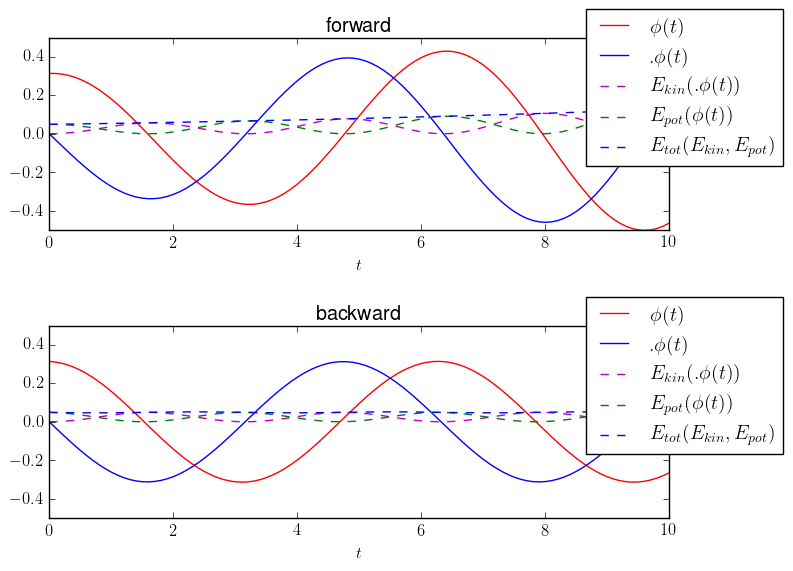

In [15]:
ϕ_dot_dot(x) = - sin(x)
dt = .1
times = collect(0:dt:10)

E_kin(v) = 1 ./ 2 .* v .^ 2

# wir setzen die laenge des pendels auf 1
E_pot(ϕ) = 1 .- cos(ϕ)

x_for, v_for = forward_euler_speeds(dt, times, ϕ_dot_dot, π/10, 0)
x_back, v_back = backward_euler_speeds(dt, times, ϕ_dot_dot, π/10, 0)

kin_for = E_kin(v_for)
pot_for = E_pot(x_for)

kin_back = E_kin(v_back)
pot_back = E_pot(x_back)

using PyPlot
rc("text", usetex=true)
subplots_adjust(hspace=.5)
subplot(211)
title("forward")
plot(times, x_for, "r-", label=L"$\phi(t)$")
plot(times, v_for, "b-", label=L"$\overset{.}{\phi}(t)$")
plot(times, kin_for, "m--", label=L"$E_{kin}(\overset{.}{\phi}(t))$")
plot(times, pot_for, "g--", label=L"$E_{pot}(\phi(t))$")
plot(times, [z[1] + z[2] for z in zip(kin_for, pot_for)], "b--", label=L"$E_{tot}(E_{kin}, E_{pot})$")
xlabel(L"$t$")
ylim(-.5,.5)
legend(bbox_to_anchor=(1.2, 1.2))

subplot(212)
title("backward")
plot(times, x_back, "r-", label=L"$\phi(t)$")
plot(times, v_back, "b-", label=L"$\overset{.}{\phi}(t)$")
plot(times, kin_back, "m--", label=L"$E_{kin}(\overset{.}{\phi}(t))$")
plot(times, pot_back, "g--", label=L"$E_{pot}(\phi(t))$")
plot(times, [z[1] + z[2] for z in zip(kin_back, pot_back)], "b--", label=L"$E_{tot}(E_{kin}, E_{pot})$")
xlabel(L"$t$")
ylim(-.5,.5)
legend(bbox_to_anchor=(1.2, 1.2))

;

# Unterschiede 
Im forward-Euler nimmt die der Fehler der Gesamtenergie mit $t^2$ kontinuierlich zu, was man bei fuer grosse $t$ sehr deutlich sehen kann:

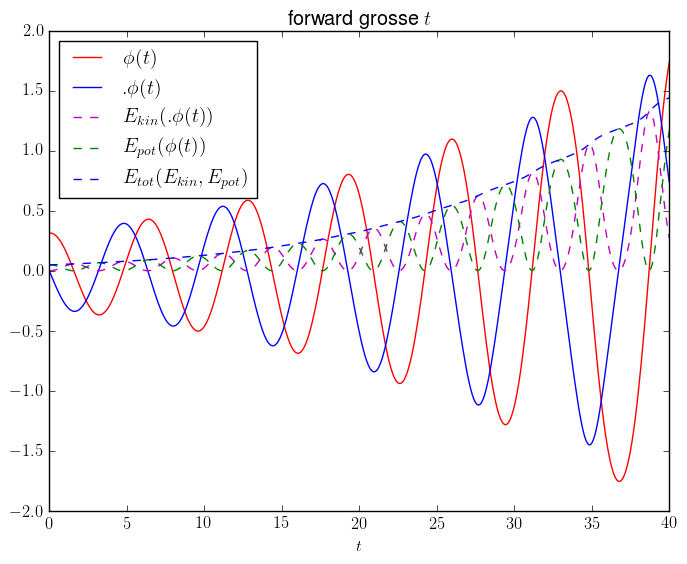

In [25]:
dt = .1
times = collect(0:dt:40)
x_for, v_for = forward_euler_speeds(dt, times, ϕ_dot_dot, π/10, 0)

kin_for = E_kin(v_for)
pot_for = E_pot(x_for)
figure()
title(L"forward grosse $t$")
plot(times, x_for, "r-", label=L"$\phi(t)$")
plot(times, v_for, "b-", label=L"$\overset{.}{\phi}(t)$")
plot(times, kin_for, "m--", label=L"$E_{kin}(\overset{.}{\phi}(t))$")
plot(times, pot_for, "g--", label=L"$E_{pot}(\phi(t))$")
plot(times, [z[1] + z[2] for z in zip(kin_for, pot_for)], "b--", label=L"$E_{tot}(E_{kin}, E_{pot})$")
xlabel(L"$t$")
legend(loc=2);

Dies laesst sich mit der Backward-Euler Methode sehr schoen unterbinden:

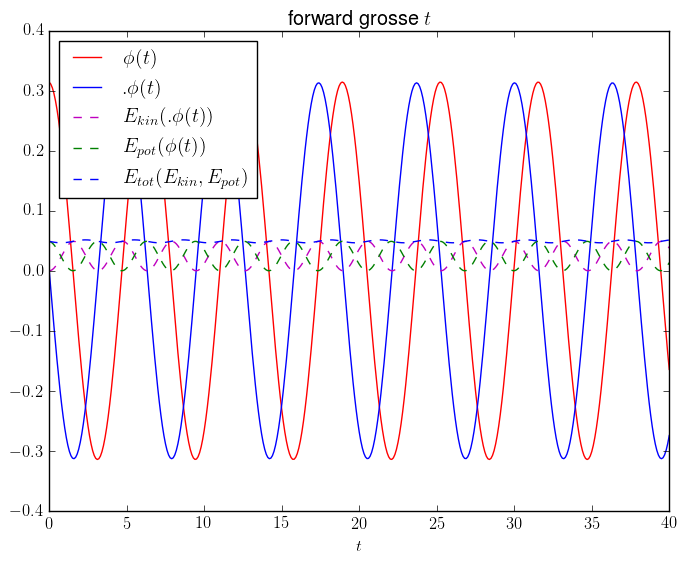

In [27]:
dt = .1
times = collect(0:dt:40)
x_for, v_for = backward_euler_speeds(dt, times, ϕ_dot_dot, π/10, 0)

kin_for = E_kin(v_for)
pot_for = E_pot(x_for)
figure()
title(L"forward grosse $t$")
plot(times, x_for, "r-", label=L"$\phi(t)$")
plot(times, v_for, "b-", label=L"$\overset{.}{\phi}(t)$")
plot(times, kin_for, "m--", label=L"$E_{kin}(\overset{.}{\phi}(t))$")
plot(times, pot_for, "g--", label=L"$E_{pot}(\phi(t))$")
plot(times, [z[1] + z[2] for z in zip(kin_for, pot_for)], "b--", label=L"$E_{tot}(E_{kin}, E_{pot})$")
xlabel(L"$t$")
legend(loc=2);

Auch hier hat die Gesamtenergie einen Fehler, der sich aber lediglich lokal auswirkt. 